# Linear and non-linear optimization with scipy 
### Including on Pandas DataFrame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.optimize import minimize
np.set_printoptions(suppress=True)

## Linear optimization

####  Example 1

Let's assume our objective is **57X1 + 45X2** and we want to maximize the output of the objective function.

and the constraints are as follows:

X1 <= 80

X2 <= 45

X1 + X2 <= 100. This is called constraint.

and non-negative constraints:

X1 >=0

X2 >= 0

X1 and X2 are called **decision variables** or simply **variables**.

From the range of possible values for each of the variables, we get the boundaries for each one of them.

We can have constraint or unconstrained optimization.

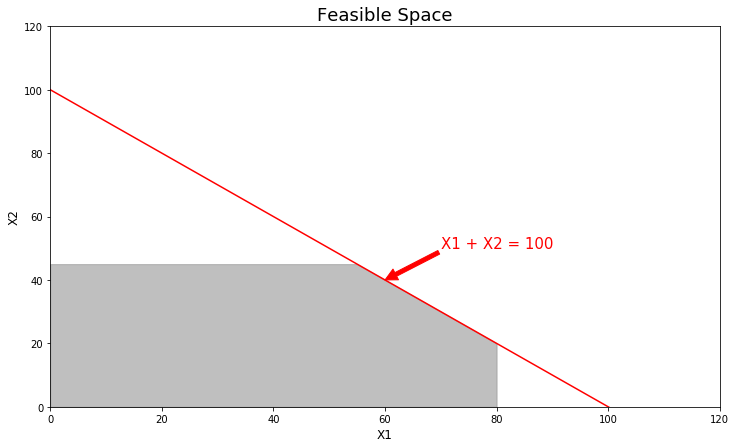

In [2]:
X1 = np.arange(0, 120)
X1_1 = np.ones(120)*80
X2 = 100 - np.arange(0, 120)
X2_2 = np.ones(120)*45
plt.figure(figsize = (12, 7))
plt.plot(X1, X2, color = 'red')
plt.ylim([0, 120])
plt.xlim([0, 120])
plt.xlabel('X1', fontsize = 12)
plt.ylabel('X2', fontsize = 12)
plt.fill_between(X1,np.minimum(X2,45), where = (X1 <= 80) , color = 'gray', alpha = 0.5)
plt.title('Feasible Space', fontsize = 18)

plt.annotate('X1 + X2 = 100', xy=(60, 40), xytext=(70, 50),size = 15,
            arrowprops=dict(color = 'red', shrink=0.001), color = 'red'
            )

plt.show()

### Visualizing the Problem

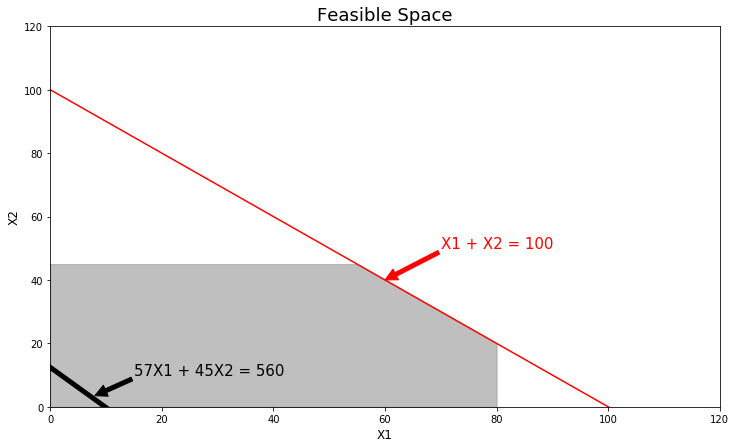

In [3]:
V1= np.arange(80)
V2 = (560- 57*V1)/45  

plt.figure(figsize = (12, 7))
plt.plot(X1, X2, color = 'red')
plt.ylim([0, 120])
plt.xlim([0, 120])
plt.xlabel('X1', fontsize = 12)
plt.ylabel('X2', fontsize = 12)
plt.fill_between(X1,np.minimum(X2,45), where = (X1 <= 80) , color = 'gray', alpha = 0.5)
plt.title('Feasible Space', fontsize = 18)
plt.annotate('X1 + X2 = 100', xy=(60, 40), xytext=(70, 50),size = 15,
            arrowprops=dict(color='red', shrink=0.001), color = 'red',
            )
plt.plot(V1, V2, linewidth = 5, color = 'black')

plt.annotate('57X1 + 45X2 = 560', xy=(8, 3.508), xytext=(15, 10),size = 15,
            arrowprops=dict(facecolor='black', shrink=0.001), color = 'black'
            )

plt.show()

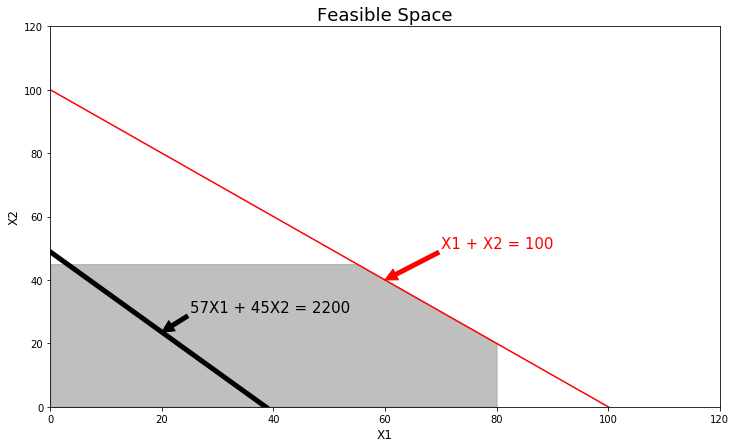

In [4]:
V1= np.arange(80)
V2 = (2200- 57*V1)/45 

plt.figure(figsize = (12, 7))
plt.plot(X1, X2, color = 'red')
plt.ylim([0, 120])
plt.xlim([0, 120])
plt.xlabel('X1', fontsize = 12)
plt.ylabel('X2', fontsize = 12)
plt.fill_between(X1,np.minimum(X2,45), where = (X1 <= 80) , color = 'gray', alpha = 0.5)
plt.title('Feasible Space', fontsize = 18)
plt.plot(V1, V2)

plt.annotate('X1 + X2 = 100', xy=(60, 40), xytext=(70, 50),size = 15,
            arrowprops=dict(color='red', shrink=0.001), color = 'red',
            )
plt.plot(V1, V2, linewidth = 5, color = 'black')

plt.annotate('57X1 + 45X2 = 2200', xy=(20, 23.55), xytext=(25, 30),size = 15,
            arrowprops=dict(facecolor='black', shrink=0.001), color = 'black',
            )

plt.show()

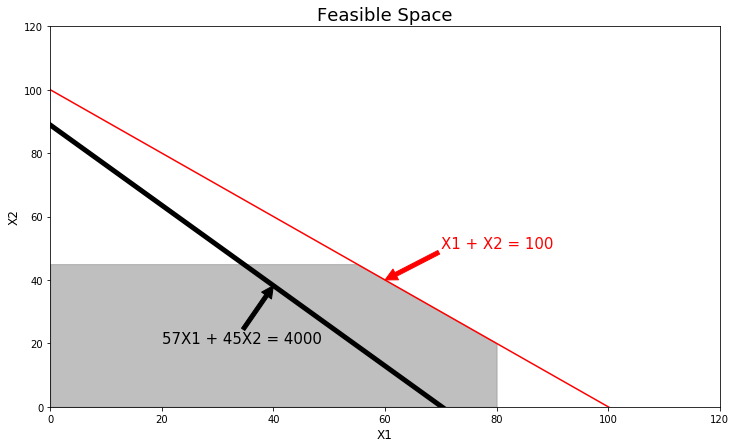

In [5]:
V1= np.arange(80)
V2 = (4000- 57*V1)/45  

plt.figure(figsize = (12, 7))
plt.plot(X1, X2, color = 'red')
plt.ylim([0, 120])
plt.xlim([0, 120])
plt.xlabel('X1', fontsize = 12)
plt.ylabel('X2', fontsize = 12)
plt.fill_between(X1,np.minimum(X2,45), where = (X1 <= 80) , color = 'gray', alpha = 0.5)
plt.title('Feasible Space', fontsize = 18)
plt.annotate('X1 + X2 = 100', xy=(60, 40), xytext=(70, 50),size = 15,
            arrowprops=dict(color='red', shrink=0.001), color = 'red',
            )
plt.plot(V1, V2, linewidth = 5, color = 'black')

plt.annotate('57X1 + 45X2 = 4000', xy=(40, 38.22), xytext=(20, 20),size = 15,
            arrowprops=dict(facecolor='black', shrink=0.001), color = 'black',
            )
plt.show()

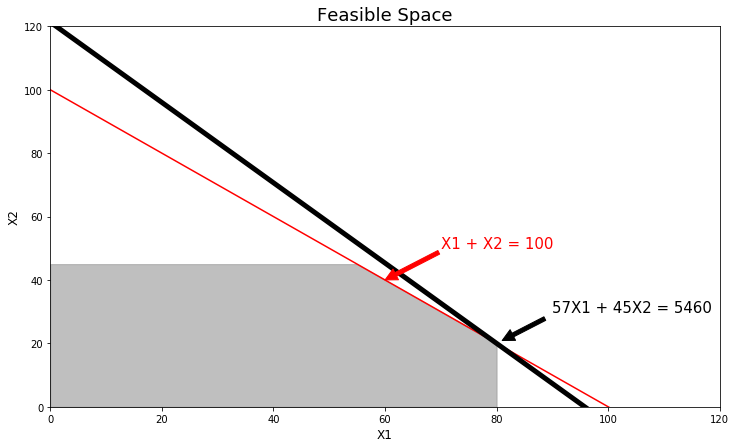

In [6]:
V1= np.arange(100)
V2 = (5460- 57*V1)/45  

plt.figure(figsize = (12, 7))
plt.plot(X1, X2, color = 'red')

plt.ylim([0, 120])
plt.xlim([0, 120])
plt.xlabel('X1', fontsize = 12)
plt.ylabel('X2', fontsize = 12)
plt.fill_between(X1,np.minimum(X2,45), where = (X1 <= 80) , color = 'gray', alpha = 0.5)
plt.title('Feasible Space', fontsize = 18)
plt.annotate('X1 + X2 = 100', xy=(60, 40), xytext=(70, 50),size = 15,
            arrowprops=dict(color='red', shrink=0.001),color = 'red',
            )
plt.plot(V1, V2, linewidth = 5, color = 'black')

plt.annotate('57X1 + 45X2 = 5460', xy=(80, 20), xytext=(90, 30),size = 15,color = 'black',
            arrowprops=dict(facecolor='black', shrink=0.1),
            )
plt.show()

### Get the optimal values

### Steps:
1. Write a function for the objective function.
2. Write function(s) for the constraint(s) if it is a constrained optimization.
3. Clearly specify the boundaries if it is bounded optimization.
4. Provide a starting point.

In [75]:
def maximize(X):
     obj = 57*X[0] + 45*X[1] 
     return obj * - 1 # multiply it by -1 because it is maximization problem

def constraint1(X):
    
    return 100 - X[0] - X[1]



con1 = {'type': 'ineq', 'fun': constraint1}

cons = ([con1])


bnds = [(0, 80), (0, 45)]
initial = [45, 45]

res = minimize(maximize, x0 = initial, 
               method = 'SLSQP',    # SLSQP optimizer is a sequential least squares programming algorithm which uses the Han–Powell quasi–Newton method 
               bounds = bnds,
               constraints = cons)
print(f'The objective for the optimal values: {round(res.fun*-1, 1)}')
print(f'The optimal values are: {res.x.round()}')

The objective for the optimal values: 5460.0
The optimal values are: [80. 20.]


## Example 2

#### AIRLINE REVENUE MANAGEMENT

####  Assume the number of flights is 166. How many to sell for each category and route to maximize sells?

In [7]:
df = pd.read_csv('airline_hypothetical.csv')
df = df.set_index(['from_to', 'category'])
df

price  demand
from_to    category               
JFK to LAX Regular     428      80
           Discount    190     120
JFK to DFW Regular     642      75
           Discount    224     100
DFW to LAX Regular     512      60
           Discount    190     110

![](linear1.PNG)

In [106]:
def maximize_sales(X):
     sales = 428*X[0] + 190*X[1] + 642*X[2] + 224*X[3]  + 512*X[4] + 190*X[5] 
     return sales * - 1 # multiply it by -1 because it is maximization problem

def constraint1(X):
    
    return 166 - X[0]- X[1]-X[2]-X[3]

def constraint2(X):
    
    return 166 - X[0]- X[1]-X[4]-X[5]

con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
cons = ([con1, con2])


bnds = [(0, 80), (0, 120), (0, 75), (0,100), (0, 60), (0, 110)]
initial = [45 for i in range(6)]

res = minimize(maximize_sales, x0 = initial, 
               method = 'SLSQP',    
               bounds = bnds,
               constraints = cons)
df['optimized_seats'] = res.x.round()
df

price  deman  optimized_seats
from_to    category                               
JFK to LAX Regular     428     80             80.0
           Discount    190    120              0.0
JFK to DFW Regular     642     75             75.0
           Discount    224    100             11.0
DFW to LAX Regular     512     60             60.0
           Discount    190    110             26.0

## Non-linear Optimization

### Unconstrained Optimization

####  Example 3

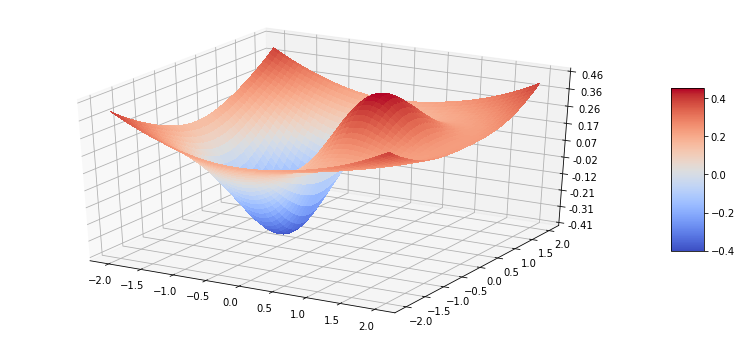

In [109]:
X = np.linspace(-2, 2, 100)
Y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(X, Y)
Z = X * np.exp(-X**2 - Y**2) + (X**2 + Y**2)/20
fig = plt.figure(figsize = (14, 6))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Gradient Descent in Machine Learning

Gradient descent goes "downhill" on a cost function  J . Minimizing the cost is like finding the lowest point in a hilly landscape.
At each step of the training, you update your parameters following a certain direction to try to get to the lowest possible point.

<img src="gradient_descent.jpg" width="700" height="500">

In [32]:
def get_minimum_point(X):
    objective = X[0] * np.exp(-X[0]**2 - X[1]**2) + (X[0]**2 + X[1]**2)/20
    return  objective

In [33]:
initial = np.array([0, 0])

res = minimize(get_minimum_point, x0 = initial, 
               method = 'Nelder-Mead')
print(f'The objective values is: {np.round(res.fun,3)}')

The objective values is: -0.405


In [34]:
res

 final_simplex: (array([[-6.69038211e-01,  7.87222908e-07],
       [-6.69055801e-01,  6.91848055e-05],
       [-6.69130590e-01, -8.41509394e-05]]), array([-0.40523687, -0.40523687, -0.40523686]))
           fun: -0.4052368691931779
       message: 'Optimization terminated successfully.'
          nfev: 104
           nit: 54
        status: 0
       success: True
             x: array([-6.69038211e-01,  7.87222908e-07])

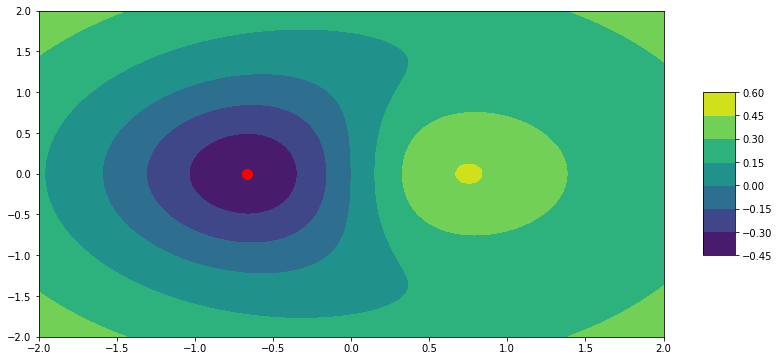

In [98]:
X = np.linspace(-2, 2, 100)
Y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(X, Y)
Z = X * np.exp(-X**2 - Y**2) + (X**2 + Y**2)/20
fig = plt.figure(figsize = (14, 6))
#ax = fig.gca(projection='3d')

# Plot the surface.
surf = plt.contourf(X, Y, Z)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.scatter(-6.69038211e-01,  7.87222908e-07,  s = 100, color = 'red')
plt.show()

#### Example 4

Now assume, shifted and scaled version of the original objective function.
![](obj1.PNG)

In [35]:
def get_minimum_point(X):
    objective = (X[0] -2) * np.exp(-(X[0]-2)**2 - (X[1]-3)**2) + ((X[0]-2)**2 + (X[1]-3)**2)/10
    return  objective

initial = np.array([0, 0])

res = minimize(get_minimum_point, x0 = initial, 
               method = 'Nelder-Mead')
print(f'The objective values is: {np.round(res.fun,3)}')
res

The objective values is: -0.384


 final_simplex: (array([[1.36387162, 2.99997534],
       [1.36387794, 3.00005528],
       [1.36392095, 2.99998117]]), array([-0.38396152, -0.38396152, -0.38396152]))
           fun: -0.3839615173665256
       message: 'Optimization terminated successfully.'
          nfev: 127
           nit: 67
        status: 0
       success: True
             x: array([1.36387162, 2.99997534])

## Constrained Optimization

#### Example 5

![](obj2.PNG)

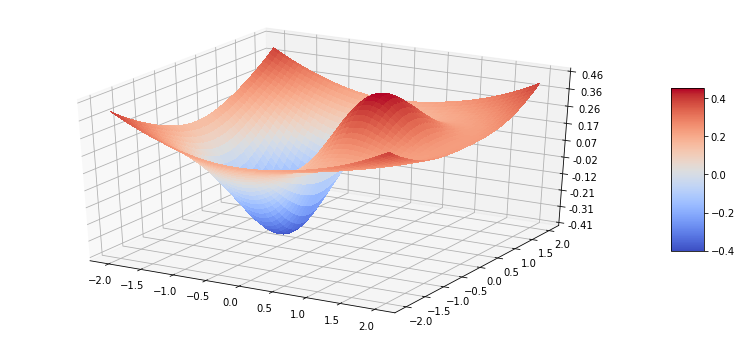

In [65]:
X = np.linspace(-2, 2, 100)
Y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(X, Y)
Z = X * np.exp(-X**2 - Y**2) + (X**2 + Y**2)/20
fig = plt.figure(figsize = (14, 6))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

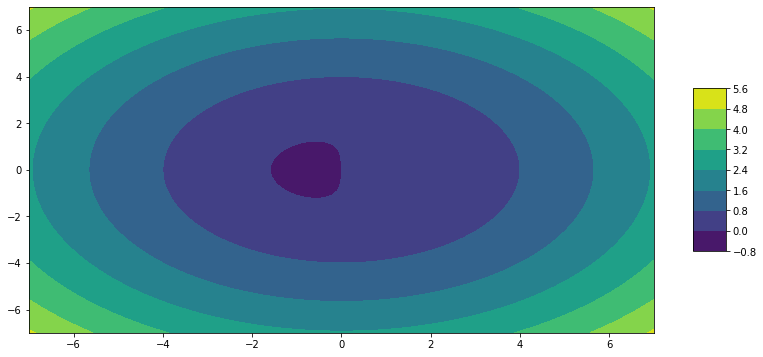

In [79]:
X = np.linspace(-7, 7, 100)
Y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(X, Y)
Z = X * np.exp(-X**2 - Y**2) + (X**2 + Y**2)/20
fig = plt.figure(figsize = (14, 6))
#ax = fig.gca(projection='3d')

# Plot the surface.
surf = plt.contourf(X, Y, Z)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


plt.show()

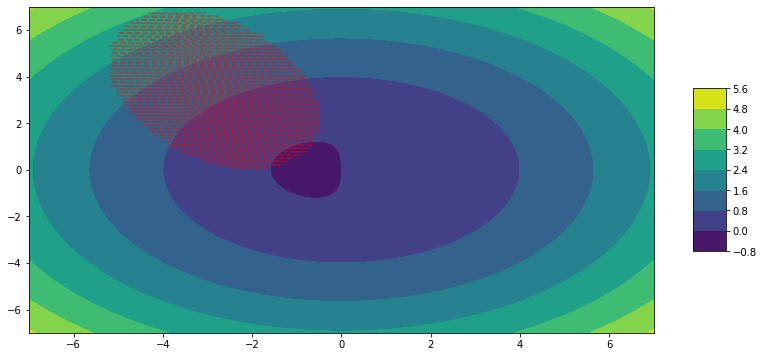

In [80]:
X = np.linspace(-7, 7, 100)
Y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(X, Y)
Z = X * np.exp(-X**2 - Y**2) + (X**2 + Y**2)/20
fig = plt.figure(figsize = (14, 6))
#ax = fig.gca(projection='3d')

# Plot the surface.
surf = plt.contourf(X, Y, Z)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

X = np.linspace(-7, 7, 100)
Y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(X, Y)
const = (X*Y)/2 + (X + 2)**2 + ((Y-2)**2)/2
X = X[const <= 2]
Y = Y[const <= 2]

plt.plot(X, Y, 'r--', alpha = 0.4)

plt.show()


In [44]:
def get_minimum_point(X):
    objective = X[0] * np.exp(-X[0]**2 - X[1]**2) + (X[0]**2 + X[1]**2)/20
    return  objective

initial = np.array([0, 0])


def constraint1(X):
    return 2 - (X[0]*X[1] + (X[0] + 2)**2 + ((X[1]-2)**2)/2)

# The sum of the ad spend values should not be greater than the budget
con1 = {'type': 'ineq', 'fun': constraint1}
cons = ([con1])

res = minimize(get_minimum_point, x0 = initial, 
               method = 'SLSQP',    
               constraints = cons)
res

     fun: -0.2760299072488676
     jac: array([-0.33854767,  0.3258836 ])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([-0.92017414,  0.43112416])

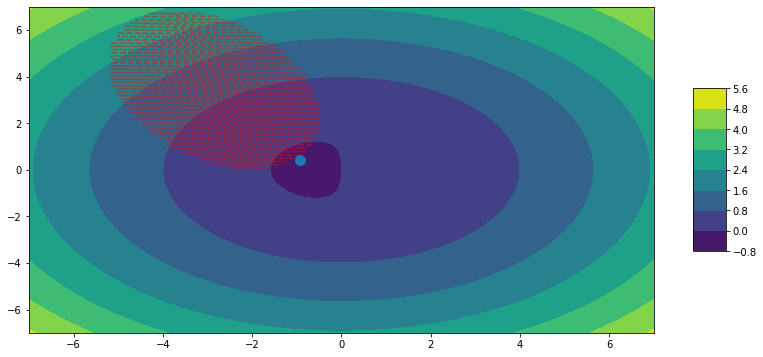

In [88]:
X = np.linspace(-7, 7, 100)
Y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(X, Y)
Z = X * np.exp(-X**2 - Y**2) + (X**2 + Y**2)/20
fig = plt.figure(figsize = (14, 6))
#ax = fig.gca(projection='3d')

# Plot the surface.
surf = plt.contourf(X, Y, Z)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

X = np.linspace(-7, 7, 100)
Y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(X, Y)
const = (X*Y)/2 + (X + 2)**2 + ((Y-2)**2)/2
X = X[const <= 2]
Y = Y[const <= 2]

plt.plot(X, Y, 'r--', alpha = 0.4)
plt.scatter(-0.92017414,  0.43112416,  s = 100)

plt.show()

### Optimization On Pandas DataFrame

In [8]:
df = pd.DataFrame({"category":list('abcdefgh'), 'x': np.random.random(8) * np.random.randint(8), 'y': np.random.random(8) * np.random.randint(8)})
df

,category,x,y
0,a,1.331049,2.256081
1,b,2.082844,3.033949
2,c,1.578562,2.278324
3,d,0.190050,4.766644
4,e,2.602733,2.298356
5,f,0.220211,1.310941
6,g,2.311357,4.826020
7,h,1.253651,3.187194


Maximize sum of $z *(y*x^{0.5} + x*y - y^2) $ where z is our decision variable.

sum(z) < 10
and 0 <= z <= 4

In [12]:
def maximize(val, df):
    
    category = df['category'].tolist()
    lookup = dict()
   
    for i in range(len(val)):
        lookup[category[i]] = val[i] # replace the previous optimal values with current optimal values
    
    df = df.replace(lookup)

    prod_xy = df['y'] * np.sqrt(df['x']) + df['x'] * df['y'] - (df['y'])**2
    obj = -1.0 * np.sum(df['category'] * prod_xy) # multiply it by -1 because it is maximization problem
    
    print('df')
    print(df)
    print('Ojective: ', obj*-1)
    
    return obj

def constraint1(val):
    
    return 10 - np.sum(val)

con1 = {'type': 'ineq', 'fun': constraint1}
cons = ([con1])

In [13]:
b = (0, 4)  # allowable minimum and maximum values
bnds = [b for i in range(df.shape[0])]
initial = np.repeat(10/df.shape[0], df.shape[0]) # initial values

res = minimize(maximize, args = df, x0 = initial, 
               method = 'SLSQP',    
               bounds = bnds,
               constraints = cons)
print(f'The objective values is: {np.round(res.fun*-1,1)}')

df
   category         x         y    z
0      1.25  1.331049  2.256081  0.0
1      1.25  2.082844  3.033949  0.0
2      1.25  1.578562  2.278324  4.0
3      1.25  0.190050  4.766644  0.0
4      1.25  2.602733  2.298356  4.0
5      1.25  0.220211  1.310941  0.0
6      1.25  2.311357  4.826020  0.0
7      1.25  1.253651  3.187194  0.0
Ojective:  -25.324719513552942
df
       category         x         y    z
0  1.400307e+00  1.331049  2.256081  0.0
1  2.377399e+00  2.082844  3.033949  0.0
2  2.152608e+00  1.578562  2.278324  4.0
3  3.979039e-13  0.190050  4.766644  0.0
4  4.000000e+00  2.602733  2.298356  4.0
5  6.968653e-02  0.220211  1.310941  0.0
6  7.505108e-14  2.311357  4.826020  0.0
7  3.264056e-14  1.253651  3.187194  0.0
Ojective:  24.575135802281213
df
       category         x         y    z
0  1.400307e+00  1.331049  2.256081  0.0
1  2.377399e+00  2.082844  3.033949  0.0
2  2.152608e+00  1.578562  2.278324  4.0
3  3.979039e-13  0.190050  4.766644  0.0
4  4.000000e+00  2.6027

df
       category         x         y    z
0  2.369714e-12  1.331049  2.256081  0.0
1  3.600825e+00  2.082844  3.033949  0.0
2  2.399175e+00  1.578562  2.278324  4.0
3  7.222557e-12  0.190050  4.766644  0.0
4  4.000000e+00  2.602733  2.298356  4.0
5  3.283797e-12  0.220211  1.310941  0.0
6  4.202723e-12  2.311357  4.826020  0.0
7  3.756979e-12  1.253651  3.187194  0.0
Ojective:  26.048753747191906
df
       category         x         y    z
0  0.000000e+00  1.331049  2.256081  0.0
1  4.000000e+00  2.082844  3.033949  0.0
2  2.000000e+00  1.578562  2.278324  4.0
3  0.000000e+00  0.190050  4.766644  0.0
4  4.000000e+00  2.602733  2.298356  4.0
5  1.490116e-08  0.220211  1.310941  0.0
6  0.000000e+00  2.311357  4.826020  0.0
7  0.000000e+00  1.253651  3.187194  0.0
Ojective:  26.13848470639602
       category         x         y    z
0  0.000000e+00  1.331049  2.256081  0.0
1  4.000000e+00  2.082844  3.033949  0.0
2  2.000000e+00  1.578562  2.278324  4.0
3  0.000000e+00  0.190050  4.7666

In [14]:
df['z'] = res.x.round(3)
df

,category,x,y,z
0,a,1.331049,2.256081,0.0
1,b,2.082844,3.033949,4.0
2,c,1.578562,2.278324,2.0
3,d,0.190050,4.766644,0.0
4,e,2.602733,2.298356,4.0
5,f,0.220211,1.310941,0.0
6,g,2.311357,4.826020,0.0
7,h,1.253651,3.187194,0.0
